Word2Vec을 이용해 북한 신문 데이터의 단어간 관계 파악해보기

- Word2Vec 학습방식
    - CBOW (Continuous Bag of Words)
        - 주변에 있는 단어들을 입력으로 중간에 있는 단어들을 예측하는 방법
    - Skip-Gram
        - 중간에 있는 단어들을 입력으로 주변 단어들을 예측하는 방법

훈련 데이터 전처리

In [28]:
import pandas as pd
#from nltk.tokenize import word_tokenize
from konlpy.tag import Mecab

nk_df = pd.read_csv('data/sample_paper_sentence_en2nk.csv', encoding='utf-8')

print("count of data (sentence):", len(nk_df))

print(nk_df.isnull().values.any()) 
nk_df = nk_df.dropna(how = 'any')

print("count of data (sentence):", len(nk_df))

nk_list = []
for en, nk in zip(nk_df['en'], nk_df['nk']):
    nk_list.append(str(nk))

tokenizer = Mecab()
result = []
for nk_sent in nk_list:
    #\xa0은 단어 잘림 방지 공백을 표현하는 유니코드 -> 공백으로 변경 필요
    nk_sent = nk_sent.replace(u'\xa0', u' ')
    #result.append(word_tokenize(nk_sent))
    result.append(tokenizer.nouns(nk_sent))

print(result)

count of data (sentence): 1849
True
count of data (sentence): 1847
[['경애', '아버지', '김정은', '원수', '조선', '소년단', '차', '대회', '대표', '기념사진'], ['사회주의', '조선', '태양', '나라', '가정', '어버이', '경애', '김정은', '원수', '주체', '년', '새해', '첫날', '조선', '소년단', '차', '대회', '대표', '기념사진'], ['사랑', '소년', '단원', '회합', '당과', '국가', '중대사', '나라', '관심', '축복', '속', '진행', '은정', '아버지', '원수', '희망', '설날', '꿈결', '소원', '영광', '기념사진', '학생', '소년', '가슴', '가슴', '무한', '행복감'], ['환영곡', '가운데', '아버지', '원수', '촬영장', '도착', '전체', '참가자', '소년', '단원', '억만금', '보화', '수', '나라', '보배', '희망', '미래', '전부', '열', '정', '원수', '격정', '속', '열광', '환호성'], ['아버지', '원수', '소년단', '대표', '넥타이', '나라', '학생', '소년', '고마움', '새해', '축원', '인사', '향기', '꽃다발'], ['원수', '열광', '환호', '답례', '조선', '소년단', '차', '대회', '주체', '소년', '운동', '력사', '전통', '혁명', '줄기', '조선', '소년', '기상', '번', '과시', '새해', '소년단', '대표', '축하'], ['원수', '조국', '번영', '해', '소년', '단원', '웃음', '소리', '담', '발', '구름', '소리', '시작', '것', '미래', '성', '위업', '확신', '우리', '당과', '국가', '인민', '힘', '기쁨', '혁명', '교대', '만', '소년', '단원', '주체', '위업', '전도',

문장의 최대 길이 : 93
문장의 평균 길이 : 20.518658734451055


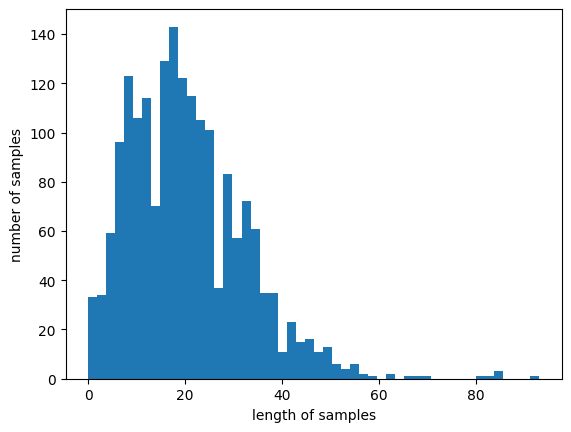

In [23]:
import matplotlib.pyplot as plt

# 문장 길이 분포 확인
print('문장의 최대 길이 :',max(len(nk_sent) for nk_sent in result))
print('문장의 평균 길이 :',sum(map(len, result))/len(result))

plt.hist([len(nk_sent) for nk_sent in result], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

W2V 훈련시키기

- Word2Vec의 하이퍼파라미터
    - vector_size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
    - window = 컨텍스트 윈도우 크기
    - min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
    - workers = 학습을 위한 프로세스 수
    - sg = 0은 CBOW, 1은 Skip-gram.

In [9]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [25]:
model.wv.vectors.shape


(1280, 100)

In [24]:
model_result = model.wv.most_similar("김정은")
print(model_result)

[('총비', 0.9986157417297363), ('경애', 0.998389720916748), ('리', 0.9978376030921936), ('참가자', 0.9973574876785278), ('월', 0.9972856044769287), ('김덕훈', 0.9970727562904358), ('리병', 0.9970523715019226), ('환호', 0.9969056844711304), ('동지', 0.9967398047447205), ('내각', 0.996701180934906)]


W2V 모델 저장하고 로드하기

In [11]:
model.wv.save_word2vec_format('nk_newspaper_w2v')
loaded_model = KeyedVectors.load_word2vec_format('nk_newspaper_w2v')

In [20]:
model_result = loaded_model.most_similar("민주주의")
print(model_result)

[('국무', 0.9975497722625732), ('비서', 0.9962835311889648), ('인민공화국', 0.9957310557365417), ('위원장', 0.9955963492393494), ('조선', 0.9946597814559937), ('동당', 0.9886840581893921), ('경애', 0.9878994822502136), ('조용원', 0.9871519207954407), ('위원', 0.9859495759010315), ('중앙', 0.9854434132575989)]
